<a href="https://colab.research.google.com/github/TYamashita-22016/M_Math/blob/main/Hw08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [2]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# それぞれのカラムに ? が何個あるかカウント
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [6]:
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [7]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [8]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [9]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [10]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.046


In [12]:
#練習問題8-1

# 自動車価格データの取得
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
# 解答
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# データの前処理
auto = auto[['price','width','engine-size']]
auto = auto.replace('?', np.nan).dropna()
auto.shape

# 学習用/検証用にデータを分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築・評価
model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.783
決定係数(test):0.778


In [13]:
#練習問題8-2
# 解答
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head() 

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [16]:
# 「fin_flg」カラムを追加し、もし「flg-50K」カラムの値が「>50K」だったら1、そうでなければ0をセットする
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.797
正解率(test):0.798


In [18]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [19]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [20]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std,y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [21]:
#練習問題8-3
# 解答
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [22]:
# 解答
from sklearn.linear_model import LinearRegression, Lasso

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1':  Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.778308,0.783189
lasso2,0.782421,0.782839
linear,0.778292,0.783189


#8-4

In [23]:
auto.head()

,price,width,engine-size
0,13495,64.1,130
1,16500,64.1,130
2,16500,65.5,152
3,13950,66.2,109
4,17450,66.4,136


In [24]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

LinearRegression(train):0.783189
LinearRegression(test):0.778292
Ridge(train):0.783187
Ridge(test):0.778592


In [25]:
# 解答
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


# 8-5

In [26]:
#練習問題8-5
# 解答
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


#8-6

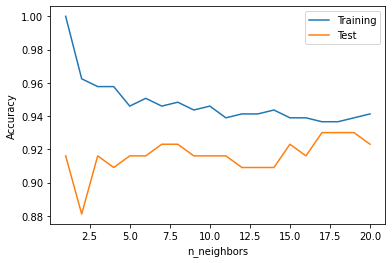

In [27]:
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy =[]

# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [28]:
#練習問題8-6
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns =[
    'classes','cap_shape','cap_surface','cap_color','odor','bruises',
    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
    'ring_number','ring_type','spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x =='p' else 0)

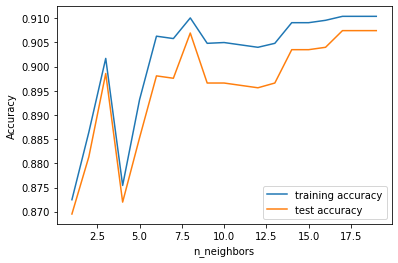

In [29]:
# 解答
from sklearn.neighbors import  KNeighborsClassifier

# 説明変数と目的変数
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

training_accuracy = []
test_accuracy =[]
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

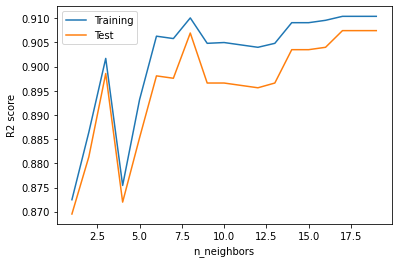

In [34]:
#練習問題8-7
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

# 解答
from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test =[]
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy,label='Training')
plt.plot(neighbors_settings, test_accuracy,label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

#8-7

In [31]:
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.932
正解率(test):0.930


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [32]:
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


In [33]:
#練習問題8-8
# 解答
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


#総合問題8-1
教師あり学習に関する用語について、それぞれの役割や意味について述べてください。どのような場面で使いますか？ インターネットや参考文献等を使って調べてみてください。

* 項目\
  一般にはもとの位置または状態に戻ること、あるいはそれを繰り返すこと\
  回帰の主な目的は、連続値などの値の予測
* 分類\
  分類の主な目的は、データが属するクラス(Yes,Noのような)を予測すること
* 教師あり学習\
  学習データに正解を与えた状態で学習させる手法\
  正解・不正解が明確な問題の解決に利用できる学習手法
* 重回帰分析\
  重回帰分析は1つの目的変数を複数の説明変数で予測しようというもの\
  身長から体重を予測するのが単回帰分析で、身長と腹囲と胸囲から体重を予測するのが重回帰分析
* ロジスティック回帰分析\
  ロジスティック回帰分析とは、複数の変数から分析を行う「多変量解析」の一種であり、量的変数から質的変数を予測
* 正則化\
正則化とは、過学習対策の手法であり、学習データへの過剰フィッティングに伴うモデル複雑化を抑制しながら、より単純な（低い次元の）モデルとして学習データを表現できることを目指したもの\
パラメータ(重み)にペナルティを科すための追加情報(バイアス)を導入することで、モデルの複雑性と学習データへの当てはまりの良さをバランスさせ、過学習対策を行う
* リッジ回帰\
正則化項のある回帰で、リッジ回帰では最小二乗法の式に正則化項（L2ノルム）を加えている\
リッジ回帰では過学習を抑えることができる
* ラッソ回帰\
正則化項のある回帰で、ラッソ回帰は最小二乗法の式に正則化項（L1ノルム）を加えている\
ラッソ回帰では、不要なパラメータ(次元や特徴量)を削ることができる
* 決定木\
意思決定や分類、判別、予測などのために作られる、木構造のデータや図などのこと
* エントロピー\
1 つのノードに異なるクラスのサンプルが含まれる割合を数値化した値を不純度という。不純度を測る指標として、エントロピーが用いられる。
* 情報利得\
情報利得は、親ノードの不純度とその子ノードの不純度の差を表す。親ノードの不純度が大きく、子ノードの不純度が小さいとき、情報利得が最も大きくなる。つまり、親ノードには様々なクラスに由来するサンプルが含まれ、それらのサンプルが正確に子ノードに振り分けているとき、情報利得が最も大きくなる。
* k-NN法\
k近傍法とは、分類に使われる手法の一つで、与えられた学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のk個を取得し、その多数決でデータが属するクラスを推定するというものだ。分類のアルゴリズムの中でも、シンプルでわかりやすいアルゴリズム。
* SVM\
機械学習モデルの一種で、非常に強力なアルゴリズム\
Support Vectorとは、データを分割する直線に最も近いデータ点の事。サポートベクターを定めて分割線が決まれば、どのクラスに属しているかの予測が出来るようになる。
データの次元が大きくなっても識別精度が良いが、学習データが増えると計算量が膨大になる
* ノーフリーランチ\
あらゆる問題を効率よく解けるような“万能”の「教師ありの機械学習モデル」や「探索／最適化のアルゴリズム」などは存在しない（理論上、実現不可能）、ということを主張する定理である。




